In [1]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nNull values per column:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe(include='all'))


Shape: (8807, 12)

Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Null values per column:
show_id        

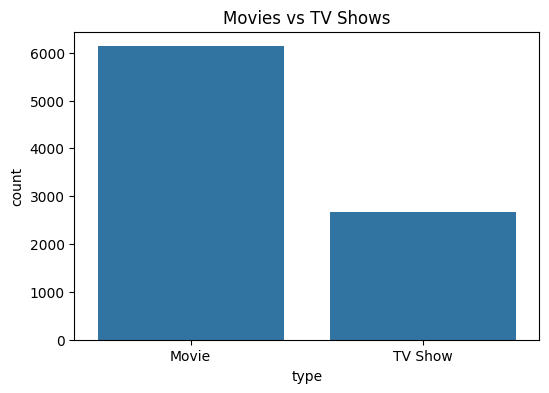

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows')
plt.show()

print(df['type'].value_counts())


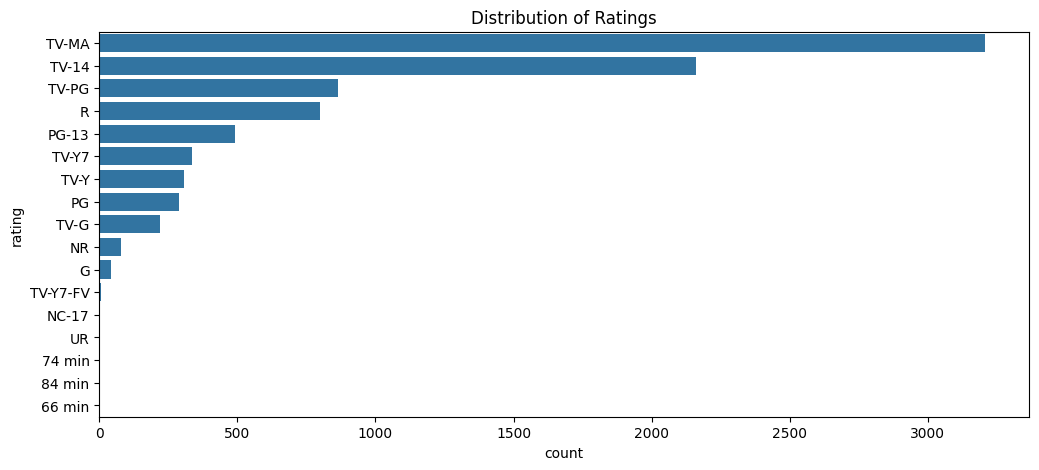

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

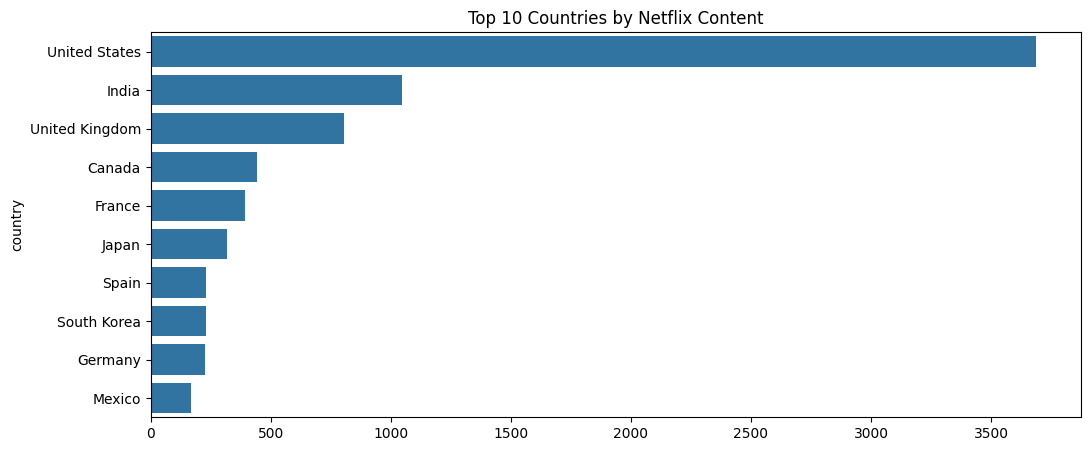

In [5]:
from collections import Counter

# Split country column and count
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Netflix Content')
plt.show()


In [9]:
df['date_added'] = pd.to_datetime(
    df['date_added'].astype(str).str.strip(),
    format='mixed',
    errors='coerce'
)
df['release_year'] = df['release_year'].astype(int)

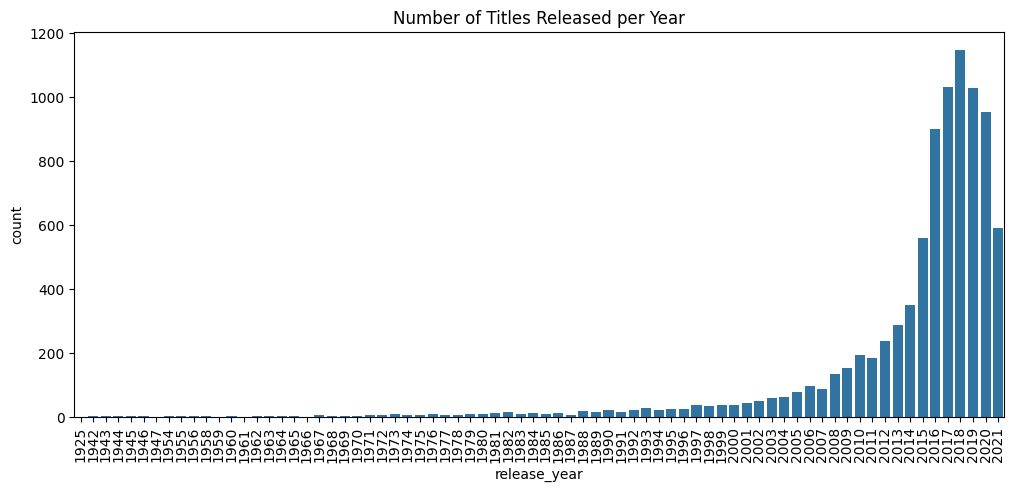

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title('Number of Titles Released per Year')
plt.show()


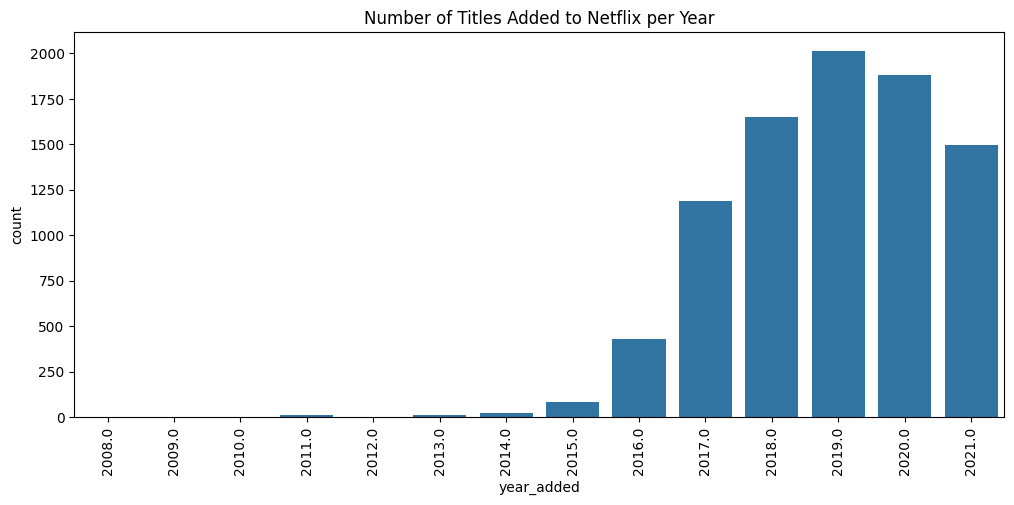

In [11]:
plt.figure(figsize=(12,5))
df['year_added'] = df['date_added'].dt.year
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Number of Titles Added to Netflix per Year')
plt.show()


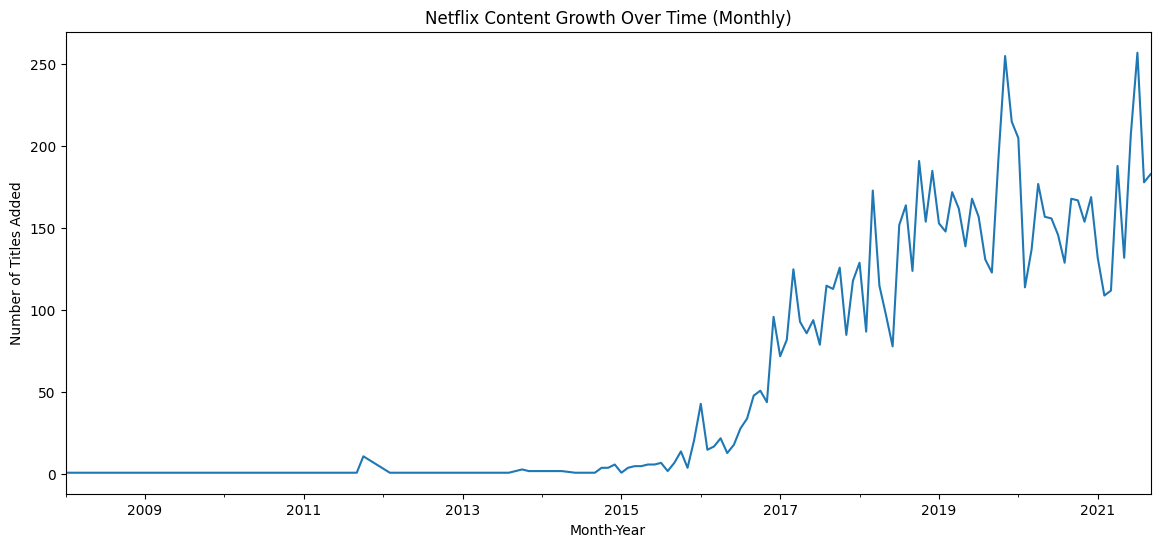

In [12]:
plt.figure(figsize=(14,6))
df['month_year_added'] = df['date_added'].dt.to_period('M')
monthly_content = df.groupby('month_year_added').size()

monthly_content.plot()
plt.title('Netflix Content Growth Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Titles Added')
plt.show()


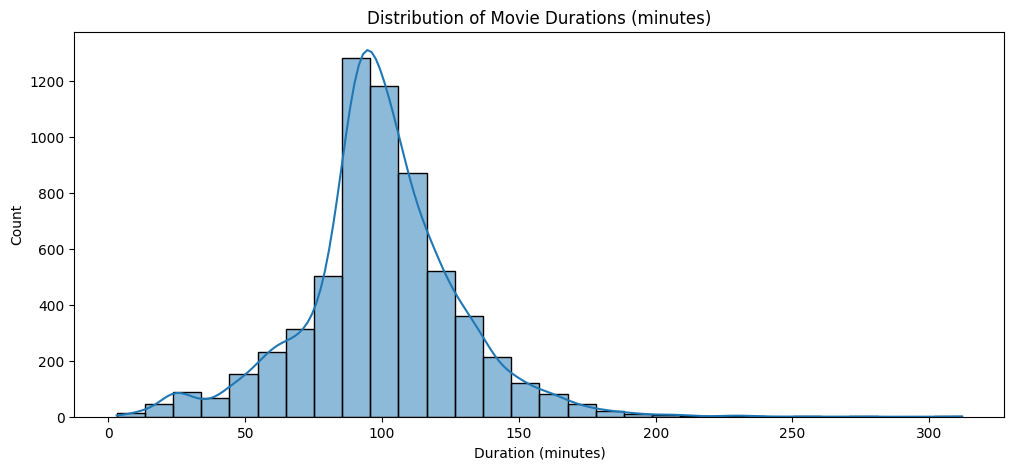

In [13]:
# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Remove rows with missing durations
movies = movies.dropna(subset=['duration'])

# Remove ' min' text and ensure valid numeric values
movies['duration_clean'] = movies['duration'].str.replace(' min', '', regex=False)

# Remove non-numeric durations (if any slipped in)
movies = movies[movies['duration_clean'].str.isnumeric()]

# Convert to integer
movies['duration_clean'] = movies['duration_clean'].astype(int)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(movies['duration_clean'], bins=30, kde=True)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.show()


/tmp/ipython-input-2602820589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)


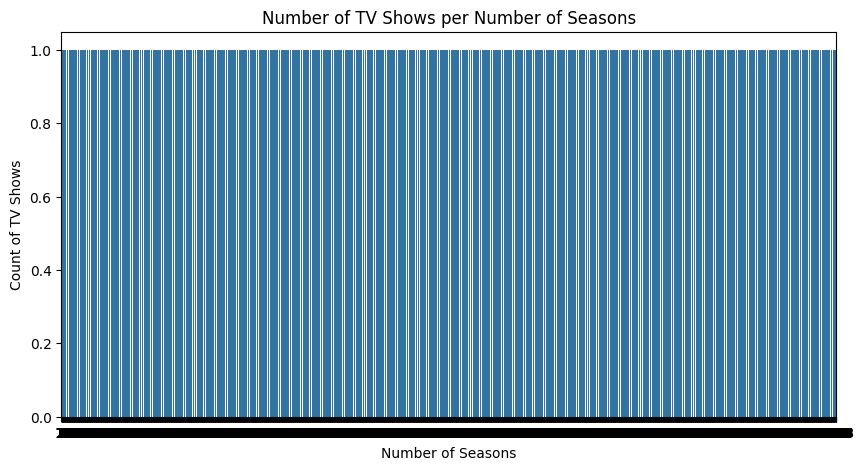

In [14]:
# Filter TV Shows and extract seasons count (remove ' Season(s)' suffix)
tv_shows = df[df['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

plt.figure(figsize=(10,5))
sns.countplot(tv_shows['seasons'])
plt.title('Number of TV Shows per Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.show()


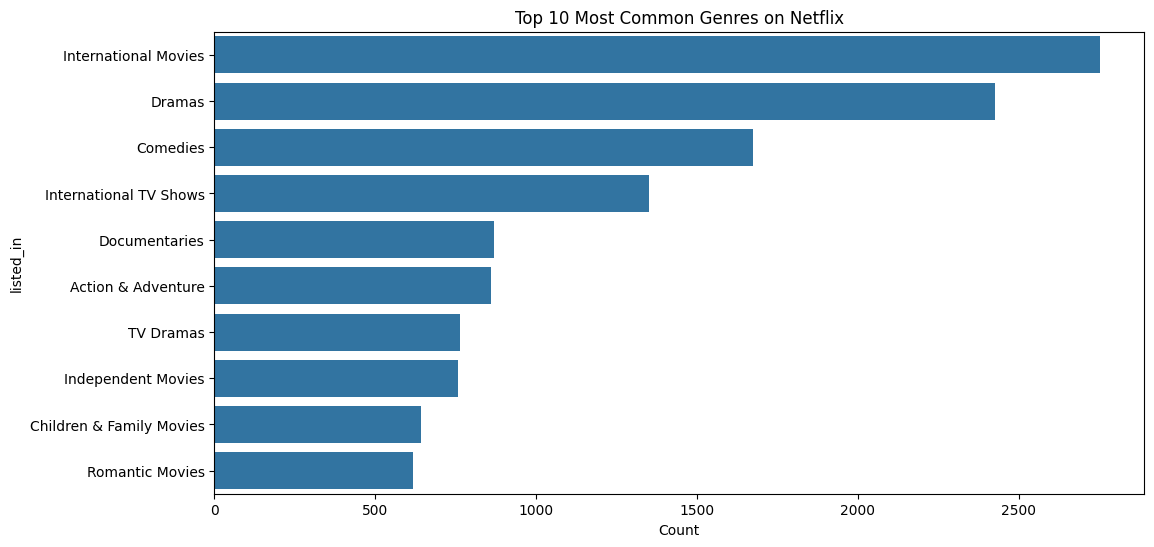

In [15]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.show()


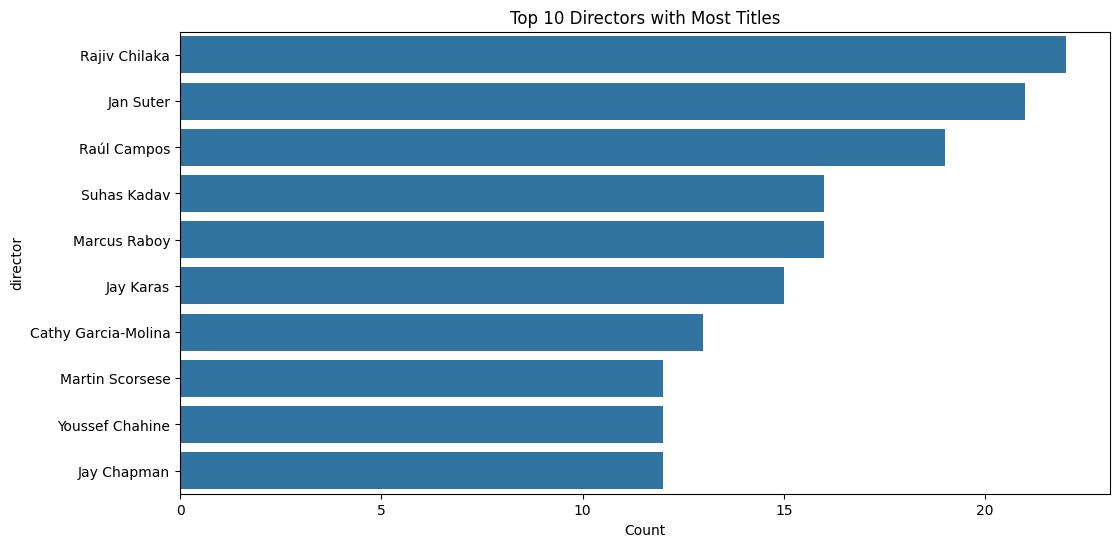

In [16]:
directors = df['director'].dropna().str.split(', ').explode()
top_directors = directors.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Count')
plt.show()


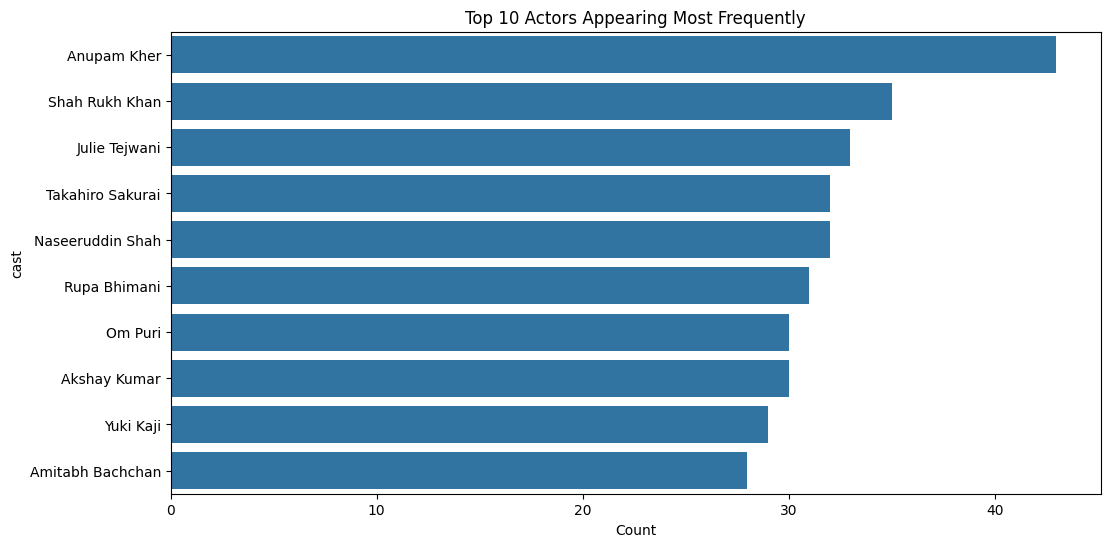

In [17]:
actors = df['cast'].dropna().str.split(', ').explode()
top_actors = actors.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors Appearing Most Frequently')
plt.xlabel('Count')
plt.show()


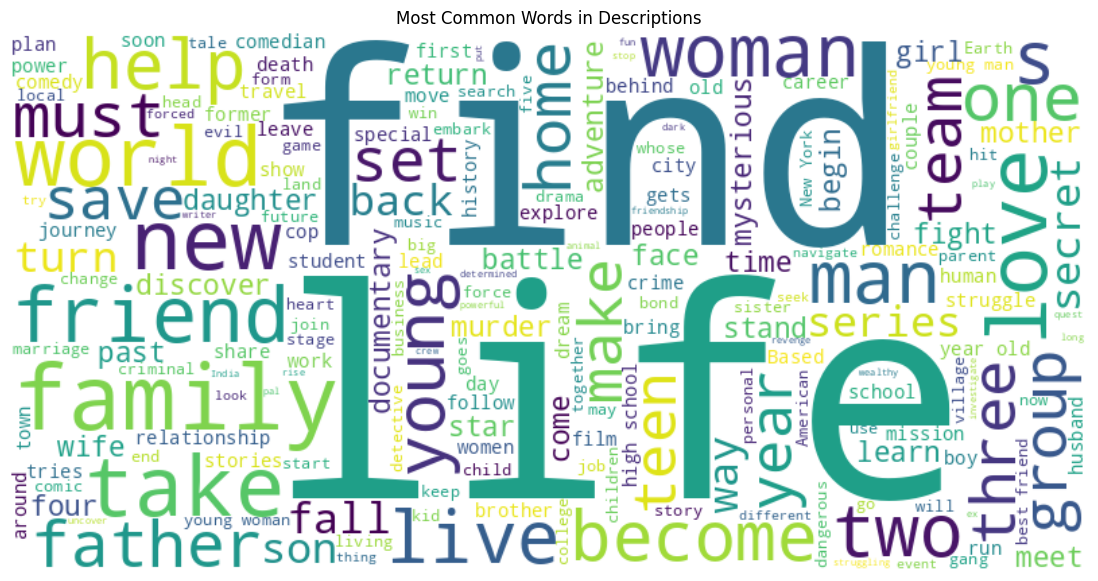

In [18]:
from wordcloud import WordCloud

descriptions = ' '.join(df['description'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


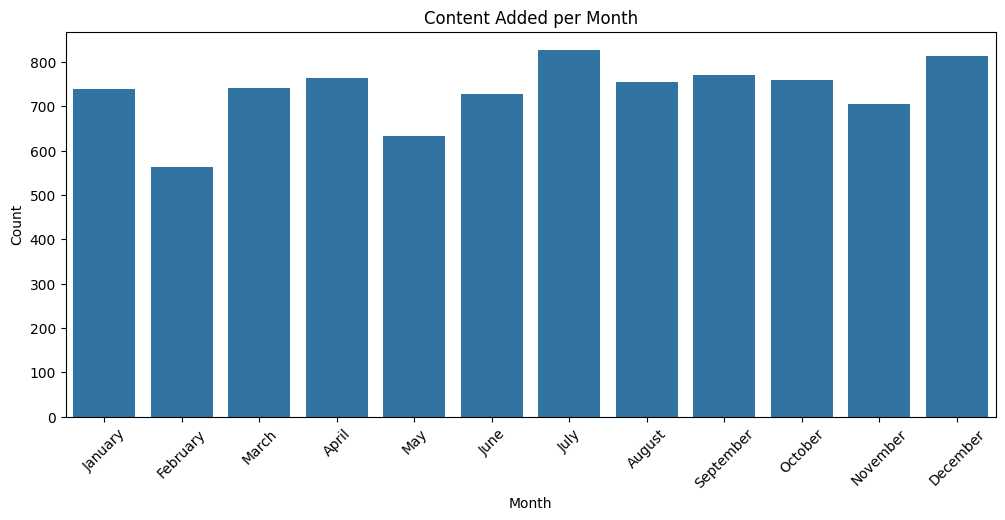

In [19]:
df['month_added'] = df['date_added'].dt.month_name()
month_counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12,5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Content Added per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x600 with 0 Axes>

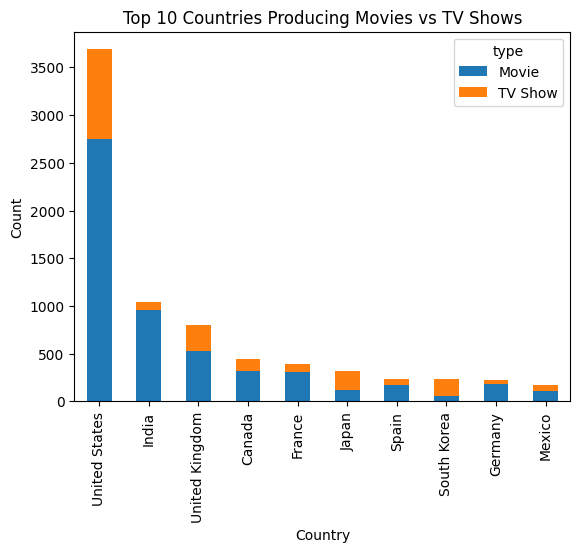

In [20]:
df_countries = df.dropna(subset=['country'])
df_countries_exp = df_countries.assign(country=df_countries['country'].str.split(', ')).explode('country')

country_type_counts = df_countries_exp.groupby(['country', 'type']).size().unstack(fill_value=0)

top_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(14,6))
country_type_counts.loc[top_countries.index].plot(kind='bar', stacked=True)
plt.title('Top 10 Countries Producing Movies vs TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


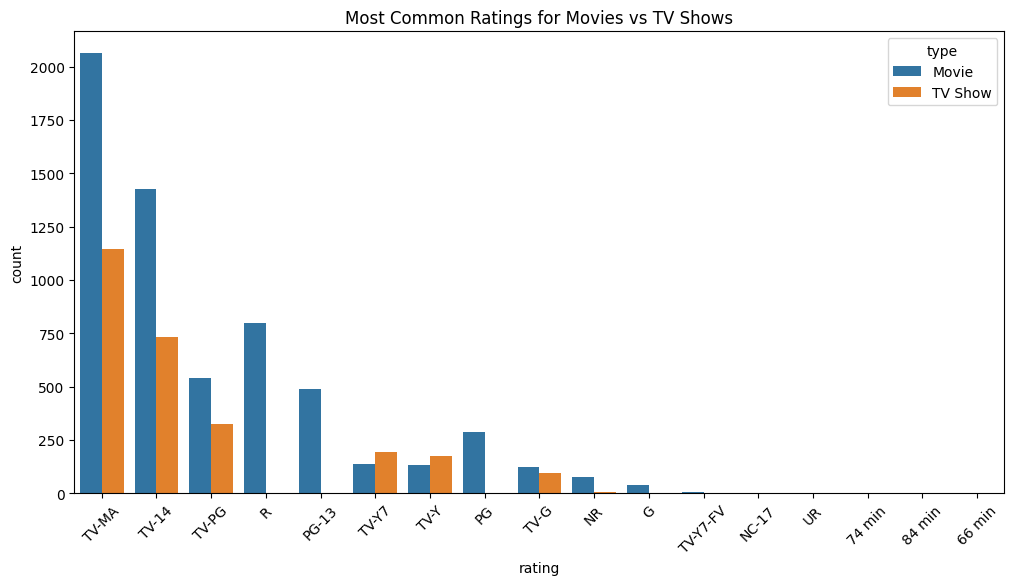

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Most Common Ratings for Movies vs TV Shows')
plt.xticks(rotation=45)
plt.show()


In [22]:
oldest = df.loc[df['release_year'].idxmin()]
newest = df.loc[df['release_year'].idxmax()]

print("Oldest title on Netflix:")
print(oldest[['title', 'release_year']])
print("\nNewest title on Netflix:")
print(newest[['title', 'release_year']])


Oldest title on Netflix:
title           Pioneers: First Women Filmmakers*
release_year                                 1925
Name: 4250, dtype: object

Newest title on Netflix:
title           Blood & Water
release_year             2021
Name: 1, dtype: object


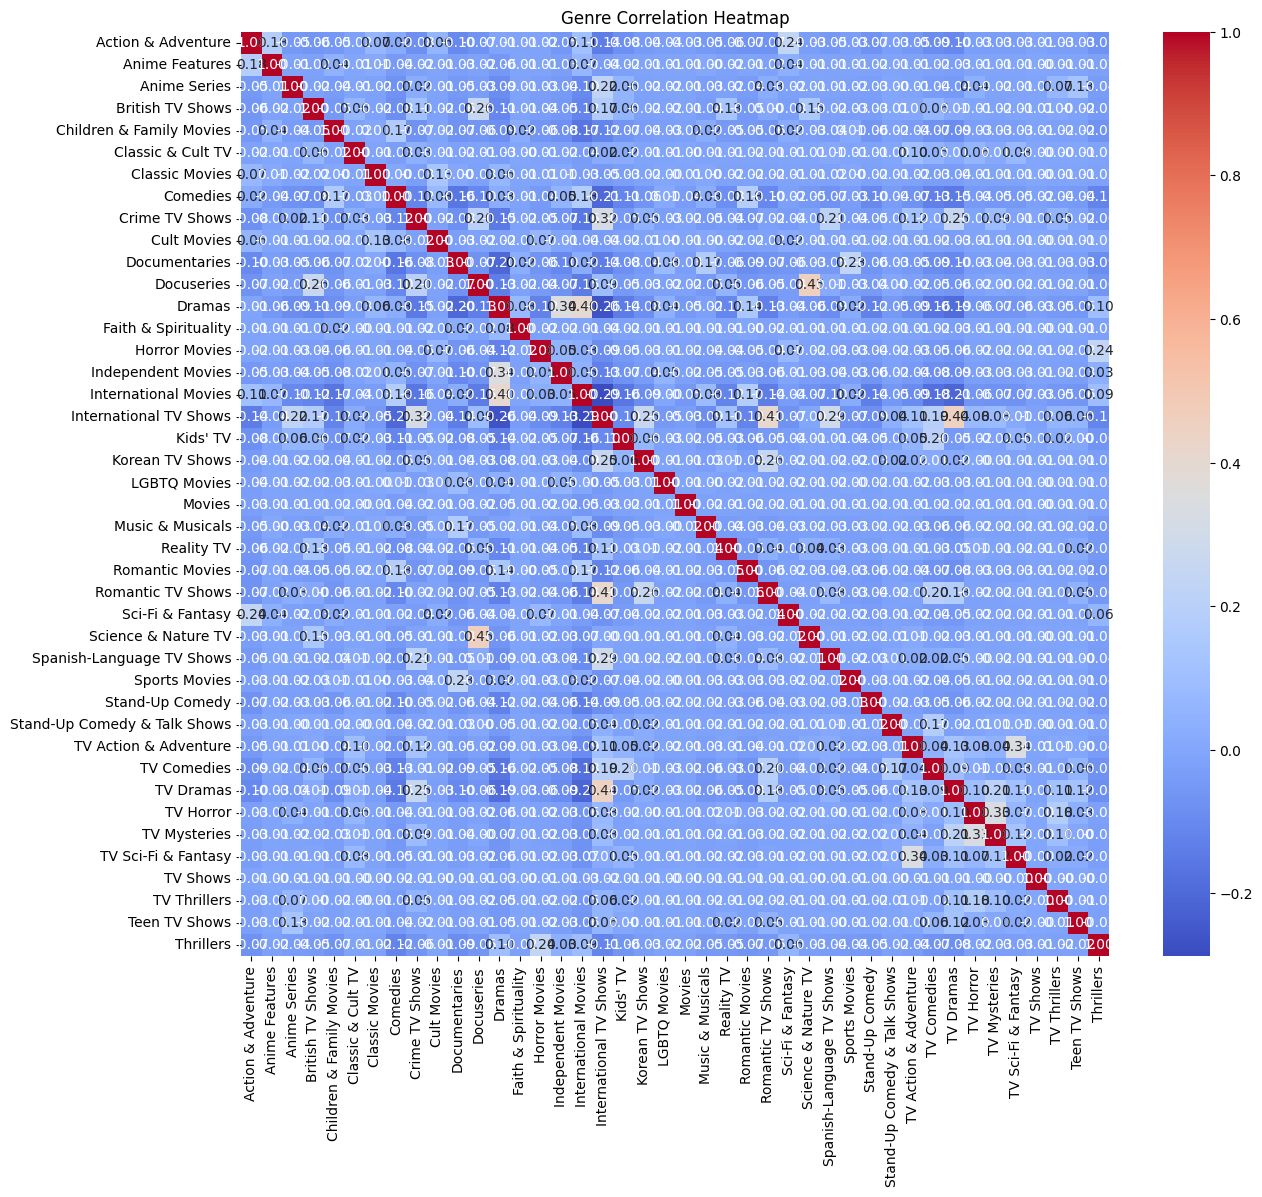

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

genre_lists = df['listed_in'].str.split(', ')
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genre_lists)

genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Correlation matrix
corr = genre_df.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Genre Correlation Heatmap')
plt.show()
